In [118]:
#Librerias

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [119]:
df_employees = pd.read_csv('data//df_employees.csv')

Analisis exploratorio

In [120]:
# Datos faltantes
df_employees.isnull().sum()

EmployeeID                 0
Year                       0
Age                        0
BusinessTravel             0
Department                 0
DistanceFromHome           0
Education                  0
EducationField             0
JobLevel                   0
MaritalStatus              0
MonthlyIncome              0
NumCompaniesWorked         0
PercentSalaryHike          0
StockOptionLevel           0
TotalWorkingYears          0
TrainingTimesLastYear      0
YearsAtCompany             0
YearsSinceLastPromotion    0
YearsWithCurrManager       0
EnvironmentSatisfaction    0
JobSatisfaction            0
WorkLifeBalance            0
JobInvolvement             0
retirementType             0
resignationReason          0
Attrition                  0
dtype: int64

In [121]:
# Descripción variables númericas
df_employees._get_numeric_data().describe().T

,count,mean,std,min,25%,50%,75%,max
EmployeeID,8820.0,2591.500000,1812.892315,1.0,1200.75,2401.0,3601.0,8813.0
Year,8820.0,2015.500000,0.500028,2015.0,2015.00,2015.5,2016.0,2016.0
Age,8820.0,36.923810,9.132783,18.0,30.00,36.0,43.0,60.0
DistanceFromHome,8820.0,9.192517,8.104566,1.0,2.00,7.0,14.0,29.0
Education,8820.0,2.912925,1.023875,1.0,2.00,3.0,4.0,5.0
JobLevel,8820.0,2.063946,1.106626,1.0,1.00,2.0,3.0,5.0
MonthlyIncome,8820.0,65029.312925,47066.219877,10090.0,29110.00,49190.0,83800.0,199990.0
NumCompaniesWorked,8820.0,2.691837,2.493771,0.0,1.00,2.0,4.0,9.0
PercentSalaryHike,8820.0,15.209524,3.658900,11.0,12.00,14.0,18.0,25.0
StockOptionLevel,8820.0,0.793878,0.851835,0.0,0.00,1.0,1.0,3.0


Se evidencia que la variable "MonthlyIncome" tiene una desviación estándar alta, esto refleja posibles diferencias significativas en los niveles salariales de cada uno de los empleados, esto podría verse reflejado posteriormete en los analisis descriptivos.



In [122]:
# Se renombra el dataframe
df = df_employees

Datos duplicados

In [123]:
# Identificación de filas duplicadas
filas_duplicadas = df.duplicated()

# Contar el número de filas duplicadas
cantidad_duplicados = filas_duplicadas.sum()
cantidad_duplicados


np.int64(0)

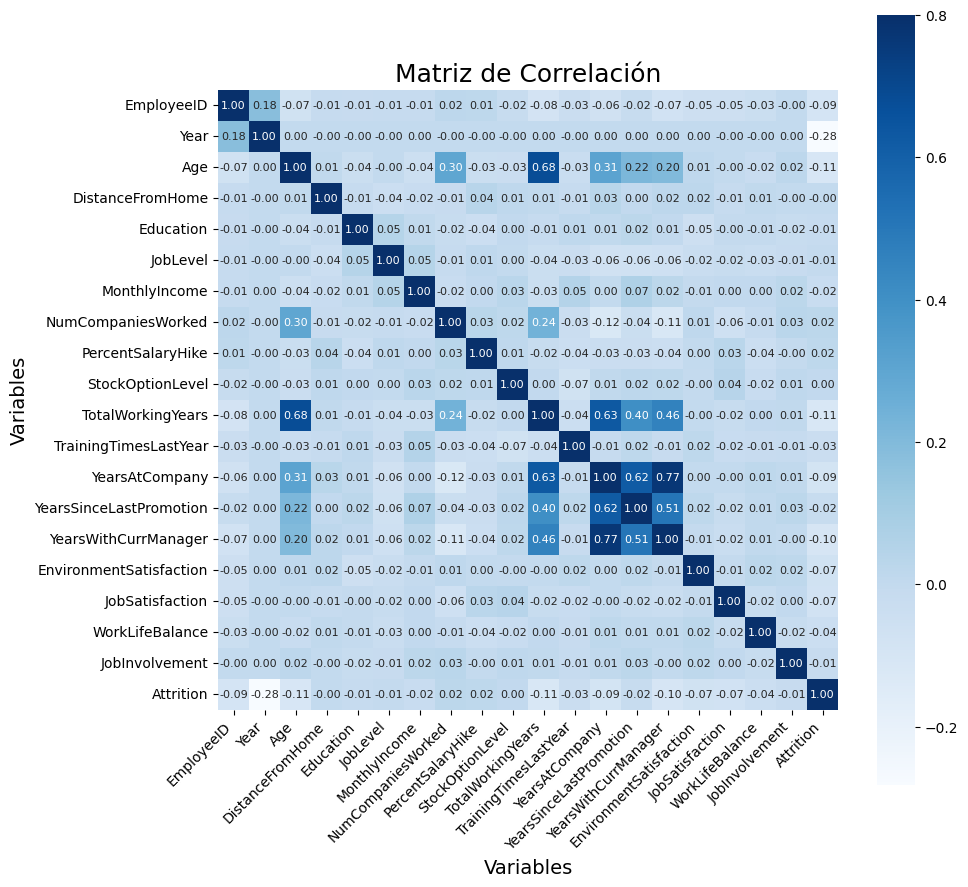

In [124]:
#Matriz de correlación 

# Selección de columnas numéricas
columnas_numericas = [col for col in df.columns if df[col].dtype in ['int64', 'float64']]

# Filtro de DataFrame a las variables numéricas
df_numerico = df[columnas_numericas]

# Calcular la matriz de correlación
corrmat = df_numerico.corr()

# Tamaño 
f, ax = plt.subplots(figsize=(10, 10)) 

# Mapa de calor
sns.heatmap(corrmat, vmax=.8, square=True, annot=True, annot_kws={"fontsize": 8}, fmt=".2f", cmap='Blues')

# Etiqueta de los ejes
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(rotation=0, fontsize=10)

plt.title('Matriz de Correlación', fontsize=18)
plt.xlabel('Variables', fontsize=14)
plt.ylabel('Variables', fontsize=14)

plt.show()


De la matriz de correlación podemos observar que hay muchas variables que no tienen una fuerte correlación entre si, sin embargo, hay una alta correlación entre 'Age' y 'TotalWorkingYears', esto tiene sentido ya que entre más años tenga un empleado, más es el total de años trabajados dentro de la empresa. También vemos que hay una alta correlación entre las variables 'YearsAtCompany' y 'YearsWithCurrManager', en el momento no es relevante ya que en el analisis se tiene de linea temporal un año, al igual que las variables 'YearsSinceLastPromotion'y 'YearsAtCompany'. Por lo que estas variables deben ser tratadas posteriormente para evitar la multicolinealidad.

Exploración de variables


In [125]:
# Eliminación de las columnas 'TotalWorkingYears', 'YearsAtCompany', 'YearsWithCurrManager'
df = df_employees.drop(['TotalWorkingYears', 'YearsAtCompany', 'YearsWithCurrManager'], axis=1)

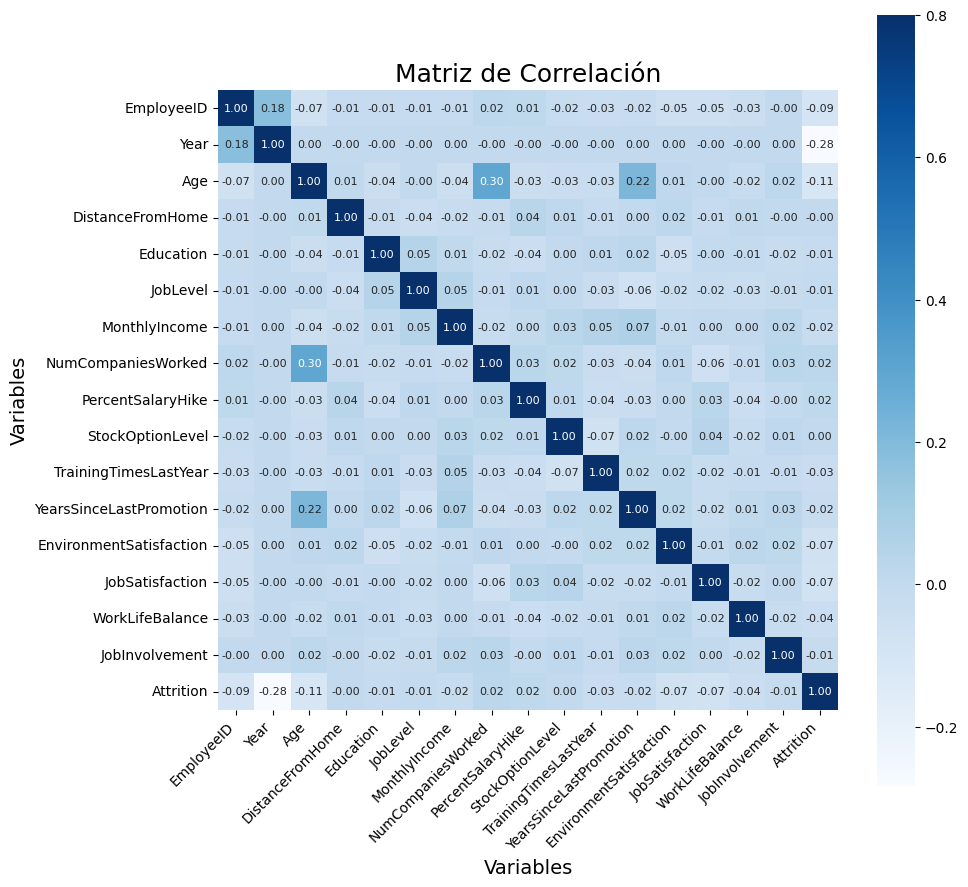

In [126]:
# Nueva matriz de correlación 

# Selección de columnas numéricas
columnas_numericas = [col for col in df.columns if df[col].dtype in ['int64', 'float64']]

# Filtro de DataFrame a las variables numéricas
df_numerico = df[columnas_numericas]

# Calcular la matriz de correlación
corrmat = df_numerico.corr()

# Tamaño 
f, ax = plt.subplots(figsize=(10, 10)) 

# Mapa de calor
sns.heatmap(corrmat, vmax=.8, square=True, annot=True, annot_kws={"fontsize": 8}, fmt=".2f", cmap='Blues')

# Etiqueta de los ejes
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(rotation=0, fontsize=10)

plt.title('Matriz de Correlación', fontsize=18)
plt.xlabel('Variables', fontsize=14)
plt.ylabel('Variables', fontsize=14)

plt.show()


Se realiza nuevamente la matriz de correlación para verificar que se hayan eliminado las altas correlaciones.

In [127]:
# Revisión de la variable objetivo "Attrition" 
df['Attrition'].describe()
df['Attrition'].unique()
df['Attrition'].nunique()
df['Attrition'].value_counts()

Attrition
0    8170
1     650
Name: count, dtype: int64

[Text(0, 0, '0'), Text(1, 0, '1')]

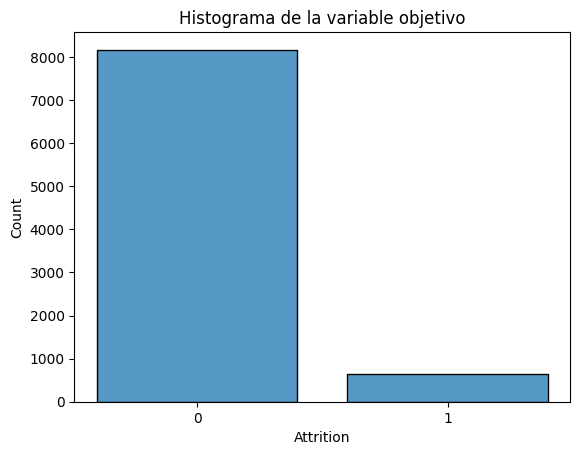

In [128]:
# Histograma de la variable objetivo
ax = sns.histplot(data=df, x='Attrition', bins=[0, 0.5, 1.5], discrete=True, shrink=0.8)

plt.xlabel('Attrition')
plt.ylabel('Count')
plt.title('Histograma de la variable objetivo')

ax.set_xticks([0, 1])
ax.set_xticklabels(['0', '1'])

In [129]:
total=8170+650
total1=650/total
total0=8170/total

total1,total0

(0.07369614512471655, 0.9263038548752834)

La variable objetivo esta desbalanceada, ya que la mayoria de los empleados con un porcentaje de 93% continuan dentro de la empresa mientras que una pequeña proporción de 7% se ha retirado.

Analisis univariado

In [130]:
df['BusinessTravel'].describe()
df['BusinessTravel'].value_counts()

BusinessTravel
Travel_Rarely        6258
Travel_Frequently    1662
Non-Travel            900
Name: count, dtype: int64

In [131]:
df['Department'].describe()
df['Department'].value_counts()

Department
Research & Development    5766
Sales                     2676
Human Resources            378
Name: count, dtype: int64

In [132]:
porcentajes_departamentos = df['Department'].value_counts(normalize=True) * 100

porcentajes_df = porcentajes_departamentos.to_frame()
porcentajes_df.columns = ['Porcentaje (%)']
porcentajes_df

,Porcentaje (%)
Department,
Research & Development,65.374150
Sales,30.340136
Human Resources,4.285714


La mayoria de los empleados se encuentran en el departamento de Research & Development con el 65,3% de empleados 

In [133]:
df['EducationField'].describe()
df['EducationField'].value_counts()

EducationField
Life Sciences       3636
Medical             2784
Marketing            954
Technical Degree     792
Other                492
Human Resources      162
Name: count, dtype: int64

In [134]:
df['MaritalStatus'].describe()
df['MaritalStatus'].value_counts()

MaritalStatus
Married     4038
Single      2820
Divorced    1962
Name: count, dtype: int64

In [135]:
df['retirementType'].describe()
df['retirementType'].value_counts()

retirementType
Not Applicable    8170
Resignation        585
Fired               65
Name: count, dtype: int64

In [136]:
df_sin_retirementtype = df[df['retirementType'] != 'Not Applicable']

porcentajes_retirementtype = df_sin_retirementtype['retirementType'].value_counts(normalize=True) * 100
porcentajes_df_retirementtype = porcentajes_retirementtype.to_frame()
porcentajes_df_retirementtype.columns = ['Porcentaje (%)']

porcentajes_df_retirementtype


,Porcentaje (%)
retirementType,
Resignation,90.0
Fired,10.0


De las personas que ya no continuan en la compañía, el 90% lo hicieron renunciando, mientras que solo el 10% fueron despedidos

In [137]:
df['resignationReason'].describe()
df['resignationReason'].value_counts()

resignationReason
Not Applicable    8235
Others             296
Salary             173
Stress             116
Name: count, dtype: int64

In [138]:
df_sin_resignationreason = df[df['resignationReason'] != 'Not Applicable']

porcentajes_resignationreason = df_sin_resignationreason['resignationReason'].value_counts(normalize=True) * 100
porcentajes_df_resignationreason= porcentajes_resignationreason.to_frame()
porcentajes_df_resignationreason.columns = ['Porcentaje (%)']

porcentajes_df_resignationreason

,Porcentaje (%)
resignationReason,
Others,50.598291
Salary,29.572650
Stress,19.829060


Graficos de densidad para las variables númericas

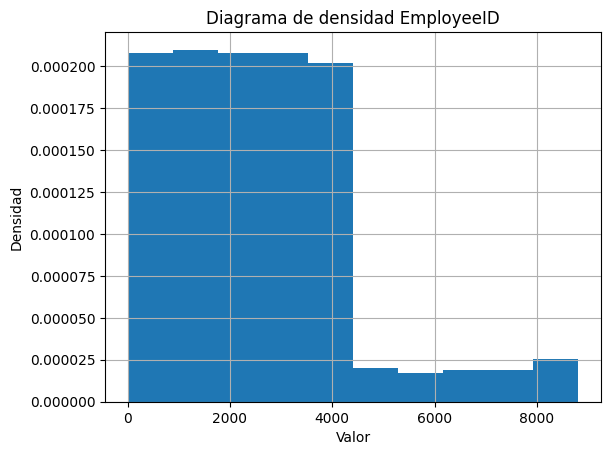

In [139]:
# Diagrama de densidad de EmployeeID
plt.hist(df['EmployeeID'], density=True)  

plt.xlabel('Valor')
plt.ylabel('Densidad')
plt.title('Diagrama de densidad EmployeeID')
plt.grid(True)

plt.show()

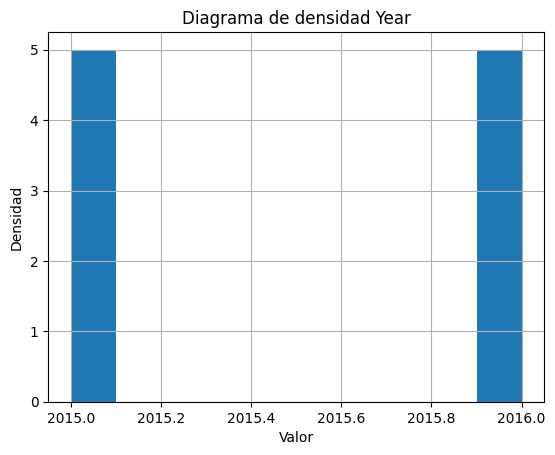

In [140]:
# Diagrama de densidad de Year
plt.hist(df['Year'], density=True)  

plt.xlabel('Valor')
plt.ylabel('Densidad')
plt.title('Diagrama de densidad Year')
plt.grid(True)

plt.show()

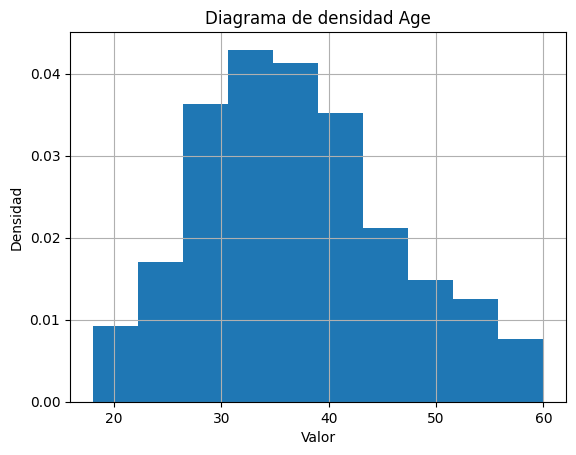

In [141]:
# Diagrama de densidad de Age
plt.hist(df['Age'], density=True) 

plt.xlabel('Valor')
plt.ylabel('Densidad')
plt.title('Diagrama de densidad Age')
plt.grid(True)

plt.show()

La mayoría de las personas se encuentran entre los 30 y 40 años, por lo que existe un grupo significativo de empleados de mediana edad.

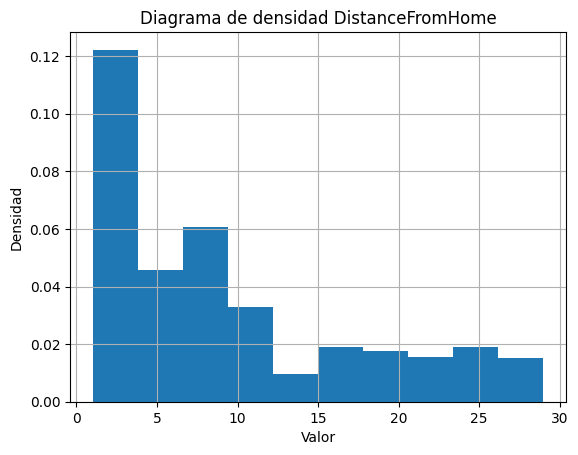

In [142]:
# Diagrama de densidad de DistanceFromHome
plt.hist(df['DistanceFromHome'], density=True) 

plt.xlabel('Valor')
plt.ylabel('Densidad')
plt.title('Diagrama de densidad DistanceFromHome')
plt.grid(True)

plt.show()

La mayoria de los empleados viven relativamente cerca de su lugar de trabajo, ya que la densidad es mas alta en los valores mas bajos de los valores de las unidades de distancia.

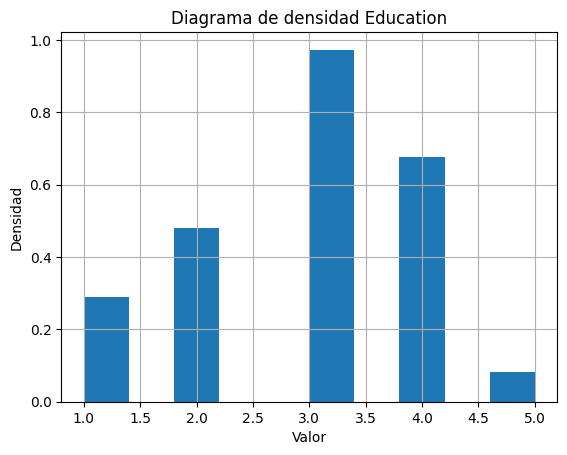

In [143]:
# Diagrama de densidad de Education
plt.hist(df['Education'], density=True)  

plt.xlabel('Valor')
plt.ylabel('Densidad')
plt.title('Diagrama de densidad Education')
plt.grid(True)
plt.show()

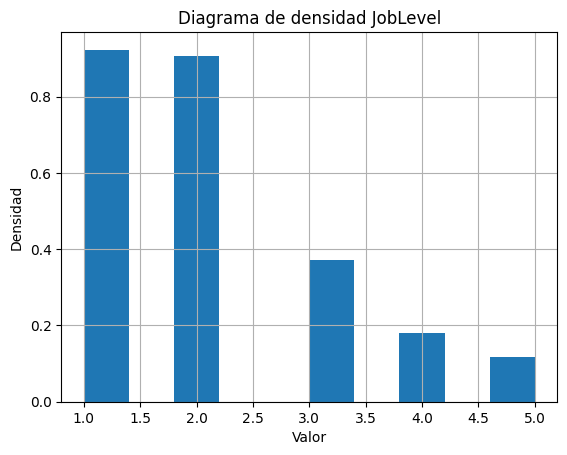

In [144]:
# Diagrama de densidad de JobLevel
plt.hist(df['JobLevel'], density=True)  

plt.xlabel('Valor')
plt.ylabel('Densidad')
plt.title('Diagrama de densidad JobLevel')
plt.grid(True)
plt.show()

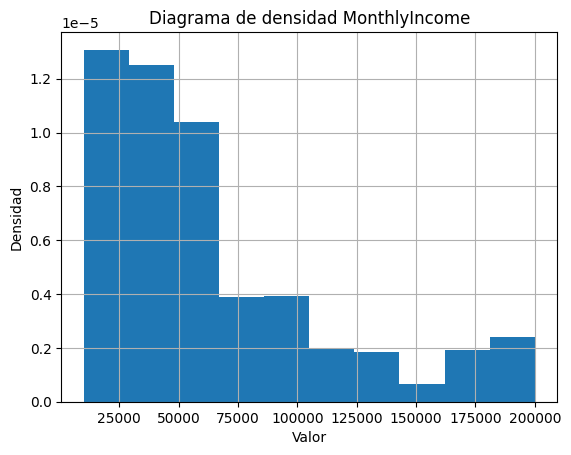

In [145]:
# Diagrama de densidad MonthlyIncome
plt.hist(df['MonthlyIncome'], density=True)  

plt.xlabel('Valor')
plt.ylabel('Densidad')
plt.title('Diagrama de densidad MonthlyIncome')
plt.grid(True)
plt.show()

Se podria decir que tiene un sesgo hacia la derecha, esto indica que hay algunos individuos que ganan significativamente más que el resto, pero la mayoría se concentra en los rangos salariales más bajos. Esta variable va ser tratada mas adelante.

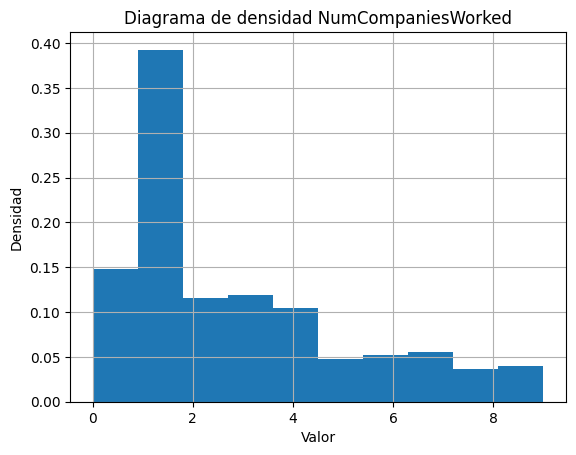

In [146]:
# Diagrama de densidad de NumCompaniesWorked
plt.hist(df['NumCompaniesWorked'], density=True)  

plt.xlabel('Valor')
plt.ylabel('Densidad')
plt.title('Diagrama de densidad NumCompaniesWorked')
plt.grid(True)
plt.show()

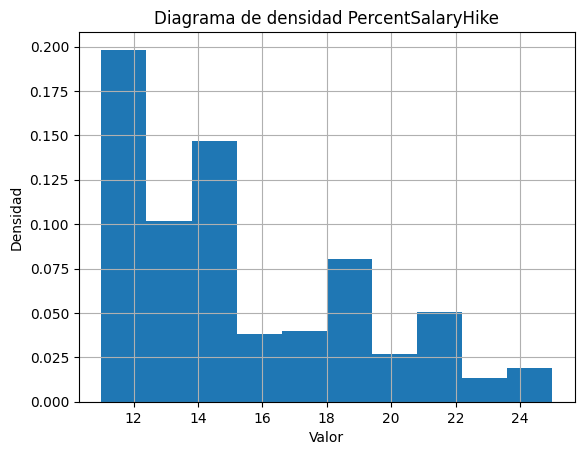

In [147]:
# Diagrama de densidad de PercentSalaryHike
plt.hist(df['PercentSalaryHike'], density=True)  

plt.xlabel('Valor')
plt.ylabel('Densidad')
plt.title('Diagrama de densidad PercentSalaryHike')
plt.grid(True)
plt.show()

La mayoría de los empleados reciben un aumento salarial en el rango bajo 10-12% aproximadamente, lo que podría significar que las políticas de aumento salarial dentro de la empresa son conservadoras y existen algunos casos de aumentos mayores con un sesgo hacia los valores más bajos por lo que se podria suponer que los aumentos salariales mas alto no se hace mucho dentro de la empresa.

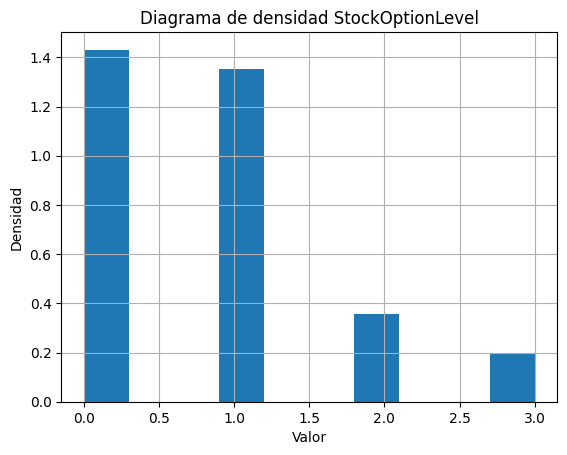

In [148]:
# Diagrama de densidad de StockOptionLevel
plt.hist(df['StockOptionLevel'], density=True) 

plt.xlabel('Valor')
plt.ylabel('Densidad')
plt.title('Diagrama de densidad StockOptionLevel')
plt.grid(True)
plt.show()

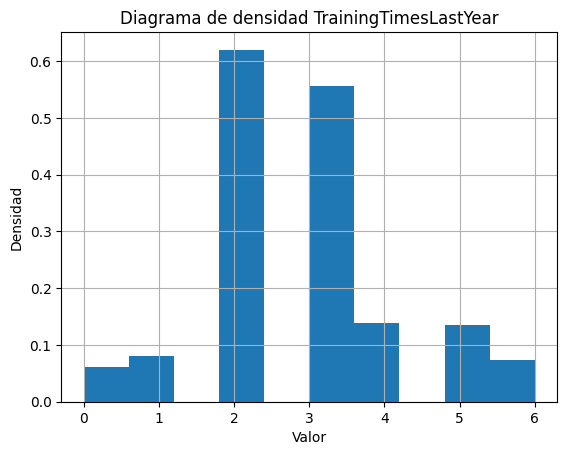

In [149]:
# Diagrama de densidad de TrainingTimesLastYear
plt.hist(df['TrainingTimesLastYear'], density=True)  

plt.xlabel('Valor')
plt.ylabel('Densidad')
plt.title('Diagrama de densidad TrainingTimesLastYear')
plt.grid(True)
plt.show() 

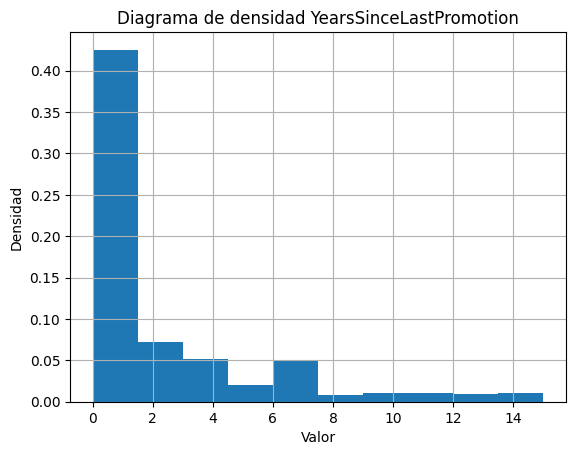

In [150]:
# Diagrama de densidad de YearsSinceLastPromotion
plt.hist(df['YearsSinceLastPromotion'], density=True) 

plt.xlabel('Valor')
plt.ylabel('Densidad')
plt.title('Diagrama de densidad YearsSinceLastPromotion')
plt.grid(True)
plt.show()

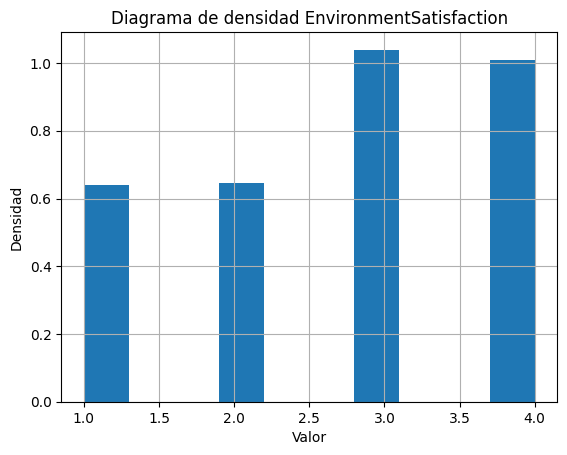

In [151]:
# Diagrama de densidad de EnvironmentSatisfaction
plt.hist(df['EnvironmentSatisfaction'], density=True) 

plt.xlabel('Valor')
plt.ylabel('Densidad')
plt.title('Diagrama de densidad EnvironmentSatisfaction')
plt.grid(True)
plt.show()

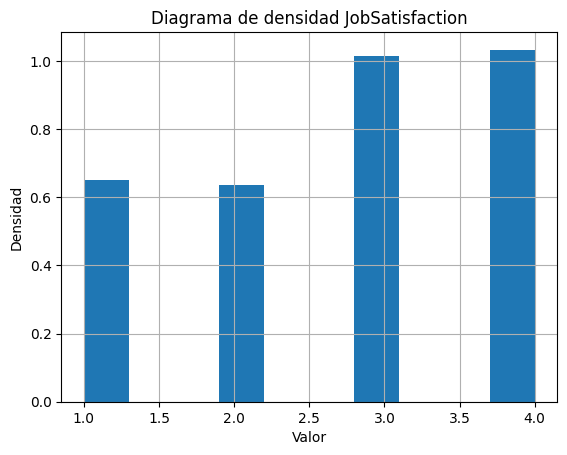

In [152]:
# Diagrama de densidad de JobSatisfaction
plt.hist(df['JobSatisfaction'], density=True)  

plt.xlabel('Valor')
plt.ylabel('Densidad')
plt.title('Diagrama de densidad JobSatisfaction')
plt.grid(True)
plt.show()

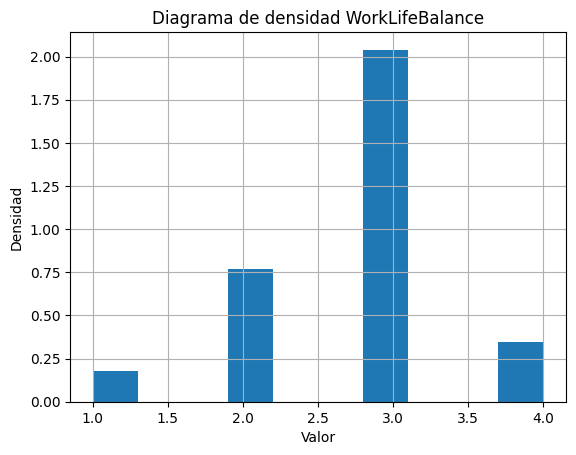

In [153]:
# Diagrama de densidad de WorkLifeBalance
plt.hist(df['WorkLifeBalance'], density=True) 

plt.xlabel('Valor')
plt.ylabel('Densidad')
plt.title('Diagrama de densidad WorkLifeBalance')
plt.grid(True)
plt.show()

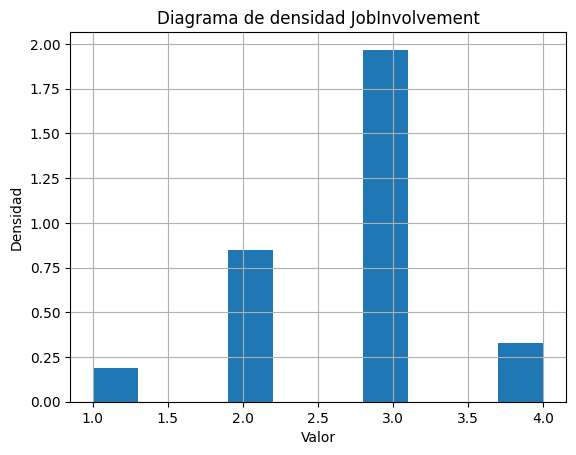

In [154]:
# Diagrama de densidad JobInvolvement
plt.hist(df['JobInvolvement'], density=True) 

plt.xlabel('Valor')
plt.ylabel('Densidad')
plt.title('Diagrama de densidad JobInvolvement')
plt.grid(True)
plt.show()

Bivariado

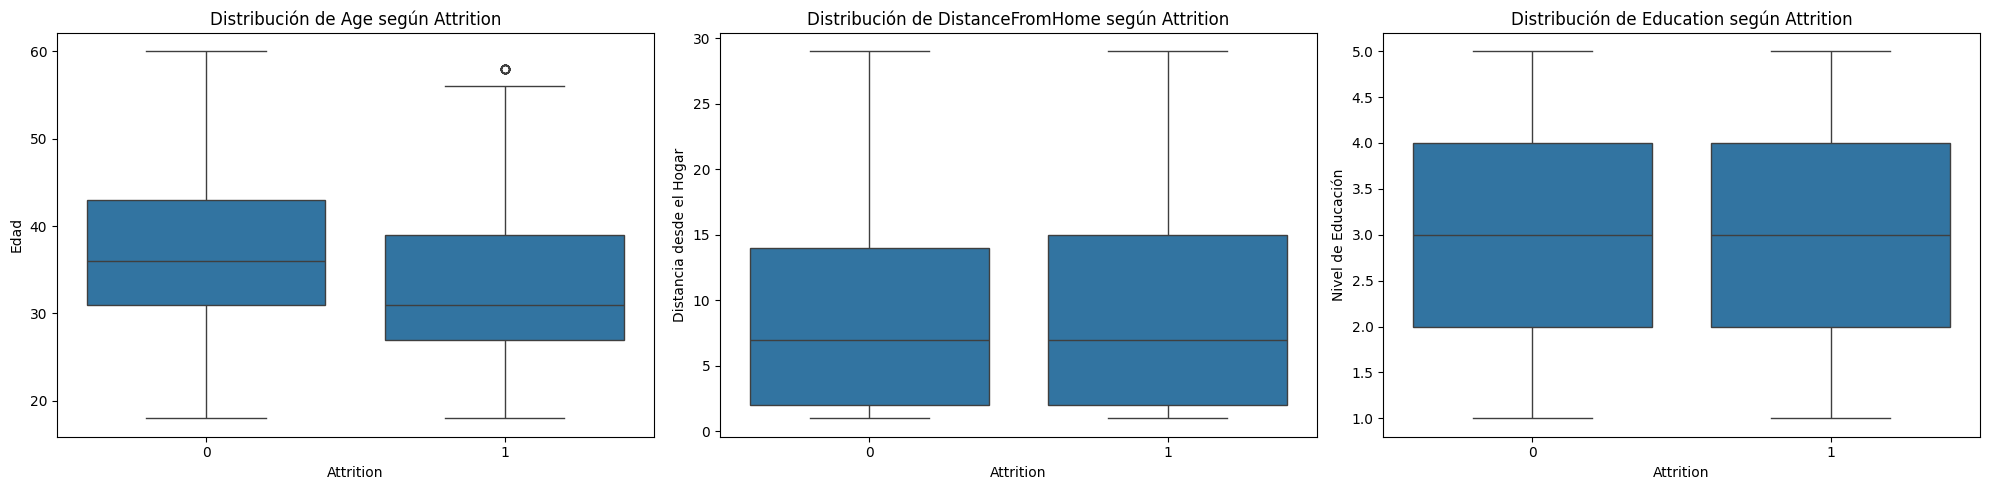

In [156]:
fig, axes = plt.subplots(1, 3, figsize=(20, 5))

# Age
sns.boxplot(x='Attrition', y='Age', data=df, ax=axes[0])
axes[0].set_title('Distribución de Age según Attrition')
axes[0].set_xlabel('Attrition')
axes[0].set_ylabel('Edad')

# DistanceFromHome
sns.boxplot(x='Attrition', y='DistanceFromHome', data=df, ax=axes[1])
axes[1].set_title('Distribución de DistanceFromHome según Attrition')
axes[1].set_xlabel('Attrition')
axes[1].set_ylabel('Distancia desde el Hogar')

# Education
sns.boxplot(x='Attrition', y='Education', data=df, ax=axes[2])
axes[2].set_title('Distribución de Education según Attrition')
axes[2].set_xlabel('Attrition')
axes[2].set_ylabel('Nivel de Educación')

plt.tight_layout()
plt.show()


Age: De los boxplot podemos evidenciar que los empleados que se van tienden a ser más jovenes que aquellos que se quedan. Tambien hay la presencia de un dato 'atipico' que en este caso no tendria ningun tipo de tratamiento ya que es la naturaleza de la variable o simplemente puede ser un error en la entrada de los datos.

DistanceFromHome: No se observan diferencias significativas en la distancia del hogar entre ambos grupos del Attrition, por lo que podriamos decir que la distancia del hogar no parece ser un factor determinante en la decisión de abandonar la empresa.

Education:No hay diferencias significativas, el nivel de educación no parece estar relacionado con la decisión de abandonar la empresa.

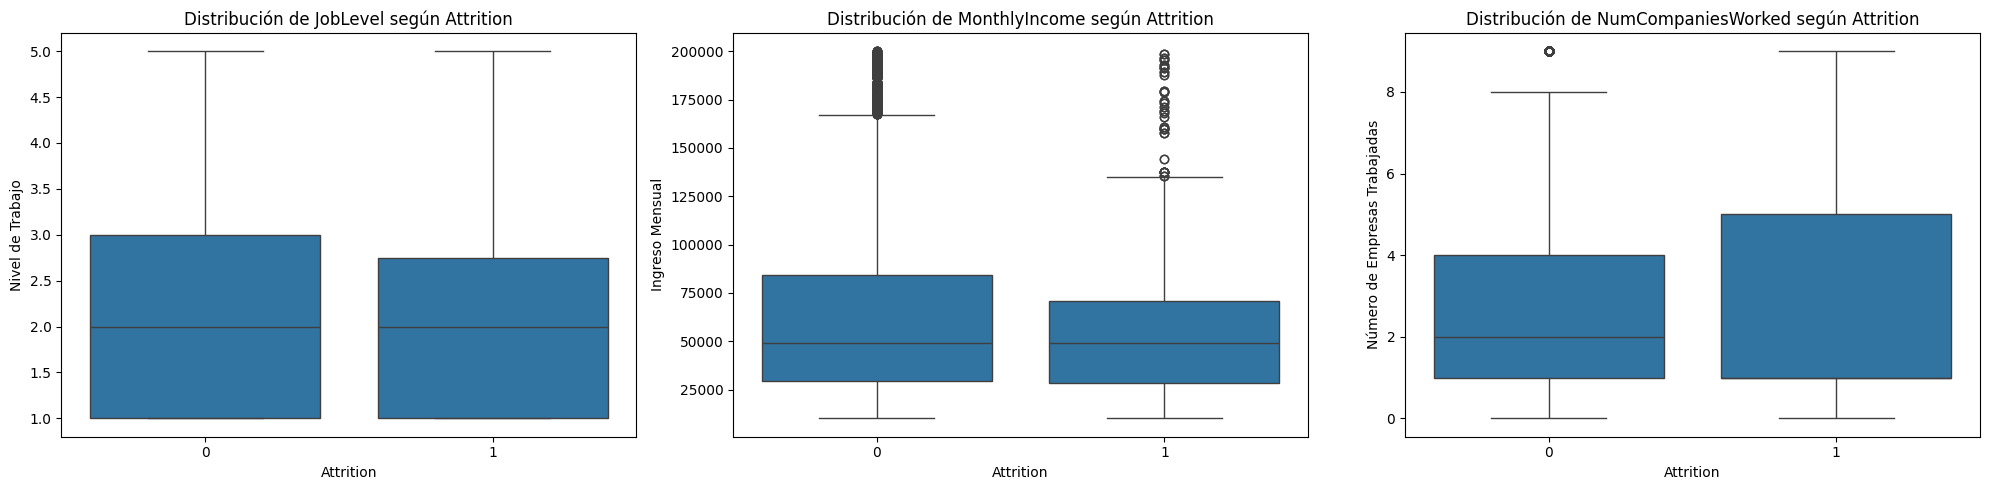

In [157]:
fig, axes = plt.subplots(1, 3, figsize=(20, 5))

# JobLevel
sns.boxplot(x='Attrition', y='JobLevel', data=df, ax=axes[0])
axes[0].set_title('Distribución de JobLevel según Attrition')
axes[0].set_xlabel('Attrition')
axes[0].set_ylabel('Nivel de Trabajo')

# MonthlyIncome
sns.boxplot(x='Attrition', y='MonthlyIncome', data=df, ax=axes[1])
axes[1].set_title('Distribución de MonthlyIncome según Attrition')
axes[1].set_xlabel('Attrition')
axes[1].set_ylabel('Ingreso Mensual')

# NumCompaniesWorked
sns.boxplot(x='Attrition', y='NumCompaniesWorked', data=df, ax=axes[2])
axes[2].set_title('Distribución de NumCompaniesWorked según Attrition')
axes[2].set_xlabel('Attrition')
axes[2].set_ylabel('Número de Empresas Trabajadas')

plt.tight_layout()
plt.show()


JobLevel: El nivel de trabajo en la empresa no parece ser un factor determinante en la decisión de abandonar la empresa.

MonthlyIncome:  Los empleados que se van tienden a tener un ingreso mensual ligeramente inferior al de aquellos que se quedan. Se observa una mayor dispersión en el ingreso mensual del grupo de los que se van con algunos valores atípicos muy altos. Por lo que esta variable va ser tratada mas adelante.

NumCompaniesWorked: Los empleados que se van tienden a haber trabajado en un mayor número de empresas anteriormente. También podriamos decir que  empleados que se van parecen haber tenido una trayectoria laboral menos estable, lo que podría estar relacionado con la decisión de abandonar la empresa actual.

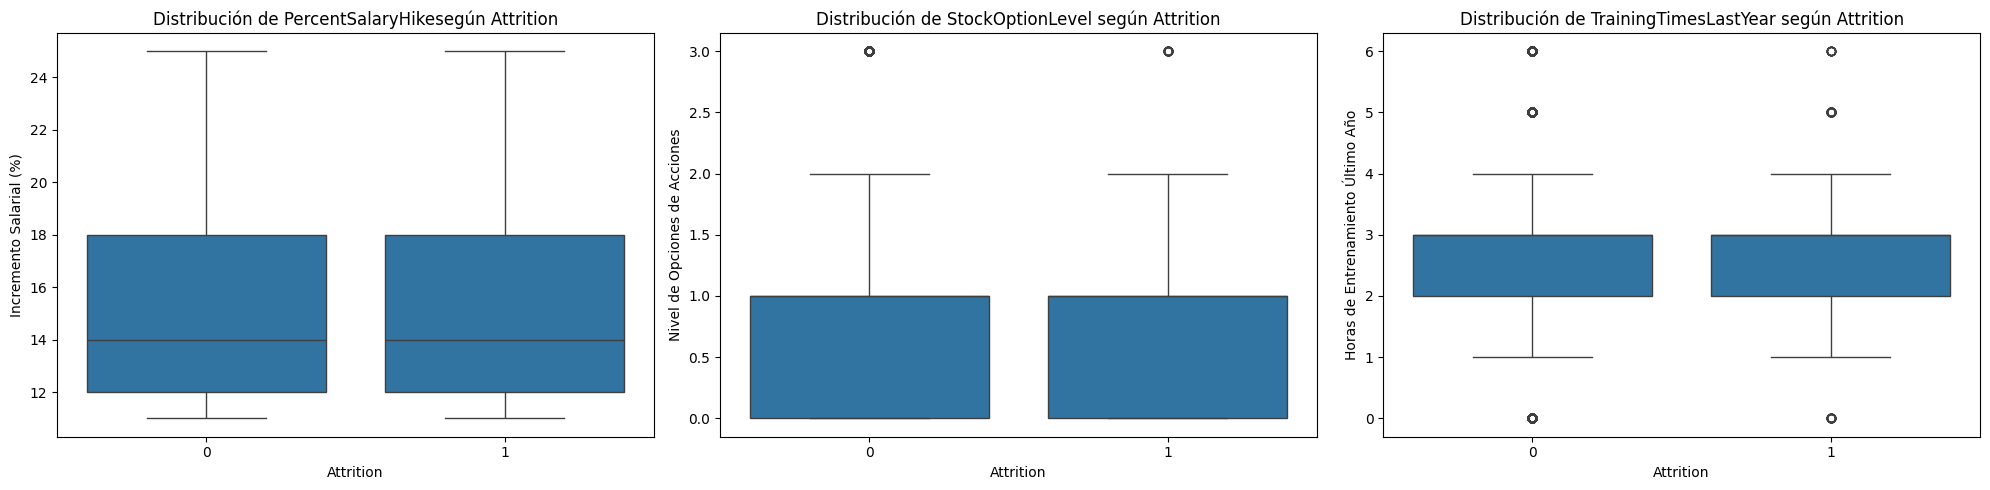

In [161]:
fig, axes = plt.subplots(1, 3, figsize=(20, 5))

# PercentSalaryHike
sns.boxplot(x='Attrition', y='PercentSalaryHike', data=df, ax=axes[0])
axes[0].set_title('Distribución de PercentSalaryHikesegún Attrition')
axes[0].set_xlabel('Attrition')
axes[0].set_ylabel('Incremento Salarial (%)')

# StockOptionLevel
sns.boxplot(x='Attrition', y='StockOptionLevel', data=df, ax=axes[1])
axes[1].set_title('Distribución de StockOptionLevel según Attrition')
axes[1].set_xlabel('Attrition')
axes[1].set_ylabel('Nivel de Opciones de Acciones')

# Horas de TrainingTimesLastYear
sns.boxplot(x='Attrition', y='TrainingTimesLastYear', data=df, ax=axes[2])
axes[2].set_title('Distribución de TrainingTimesLastYear según Attrition')
axes[2].set_xlabel('Attrition')
axes[2].set_ylabel('Horas de Entrenamiento Último Año')

plt.tight_layout()
plt.show()


PercentSalaryHike: No se observan diferencias significativas en el incremento salarial promedio entre ambos grupos. Por lo que podria ser un factor no muy determinante para tomar decisiones

StockOptionLevel: No se observan diferencias significativas en el StockOptionLevel entre ambos grupos, aunque se observan algunos valores atípicos

TrainingTimesLastYear: La mediana es similar en ambos grupos, también hay algunos outliers en ambos grupos, pero estos parecen ser simétricos, indicando que el número de horas de entrenamiento no muestra una diferencia significativa con respecto a la retención de empleados.

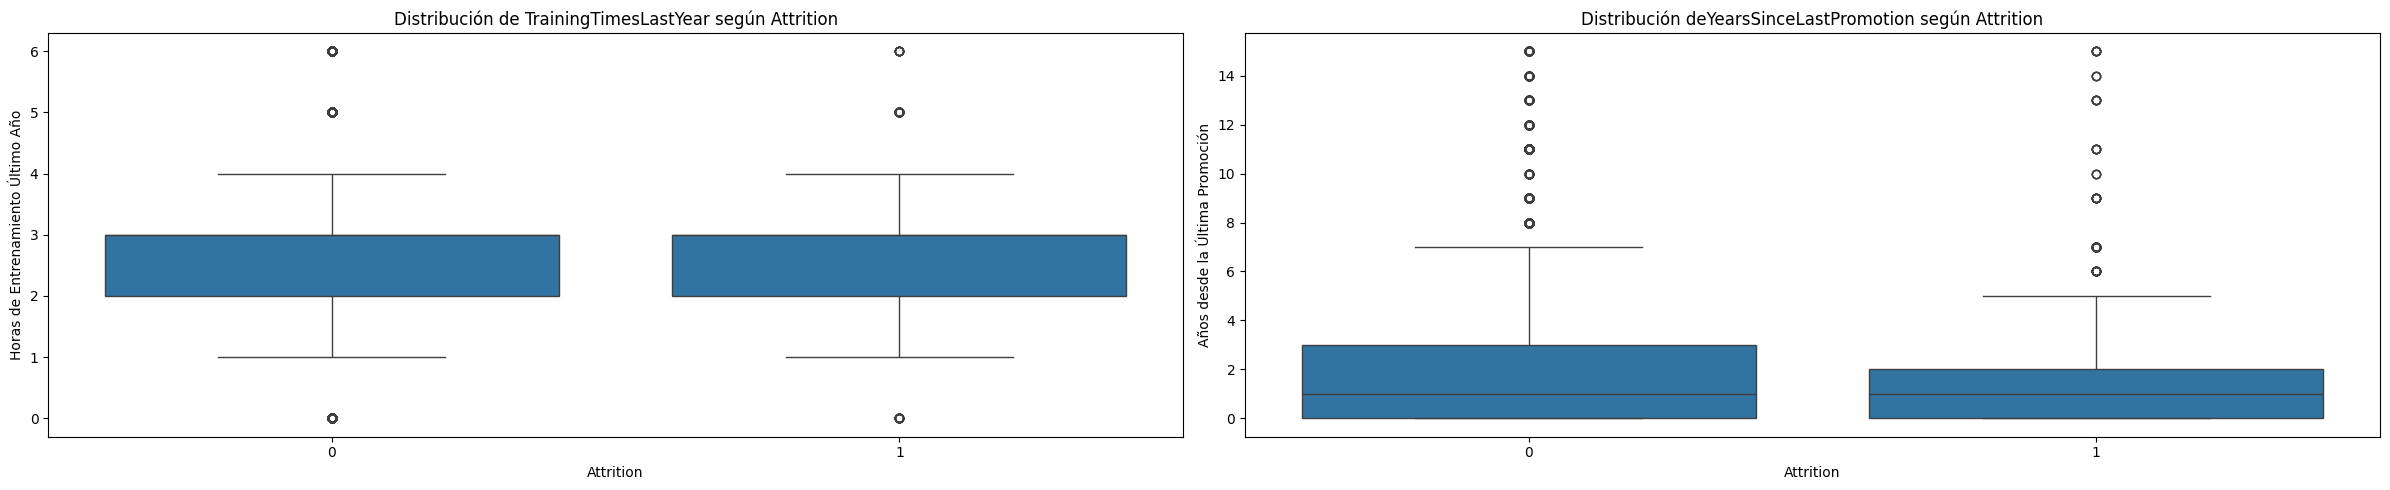

In [163]:
fig, axes = plt.subplots(1, 2, figsize=(24, 5))

# Horas de TrainingTimesLastYear
sns.boxplot(x='Attrition', y='TrainingTimesLastYear', data=df, ax=axes[0])
axes[0].set_title('Distribución de TrainingTimesLastYear según Attrition')
axes[0].set_xlabel('Attrition')
axes[0].set_ylabel('Horas de Entrenamiento Último Año')

# YearsSinceLastPromotion
sns.boxplot(x='Attrition', y='YearsSinceLastPromotion', data=df, ax=axes[1])
axes[1].set_title('Distribución deYearsSinceLastPromotion según Attrition')
axes[1].set_xlabel('Attrition')
axes[1].set_ylabel('Años desde la Última Promoción')



plt.tight_layout()
plt.show()


TrainingTimesLastYear: La mediana es similar en ambos grupos, también hay algunos outliers en ambos grupos, pero estos parecen ser simétricos, indicando que el número de horas de entrenamiento no muestra una diferencia significativa con respecto a la retención de empleados.

YearsSinceLastPromotion: La mediana de años desde la última promoción es similar entre los dos grupos, pero ligeramente mayor la de los que permanecen 


In [164]:
df.to_csv('data/df_employees_models.csv', index=False)